In [3]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/sample_13.png', cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold to the image
_, binary = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the bounding box for each contour
boxes = [cv2.boundingRect(c) for c in contours]

# Calculate the combined bounding box points
x = min(box[0] for box in boxes)
y = min(box[1] for box in boxes)
w = max(box[0] + box[2] for box in boxes) - x
h = max(box[1] + box[3] for box in boxes) - y

# Crop the image to the bounding box size
crop = img[y:y+h, x:x+w]

# Save the cropped image
cv2.imwrite('/content/cropped_image.png', crop)


True

In [8]:
import cv2
img = cv2.imread('/content/cropped_image.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img,(224,224))

In [10]:
img1.shape

(224, 224)

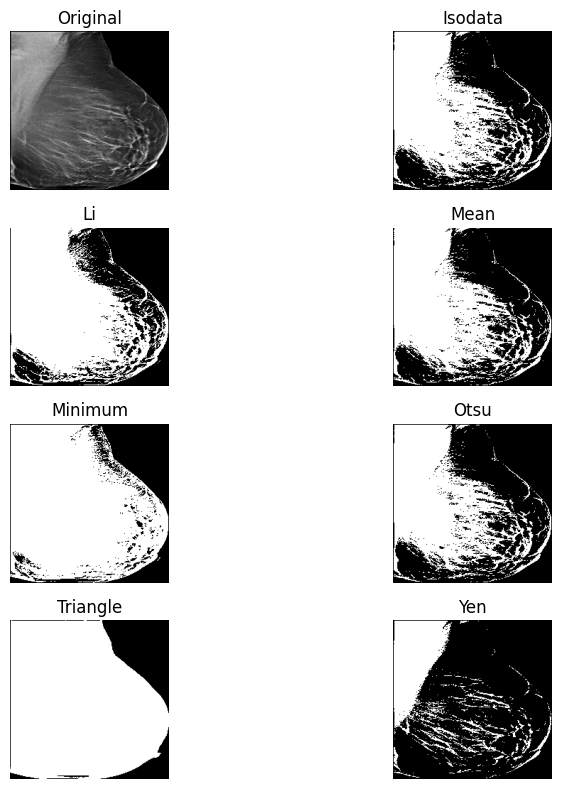

In [11]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import try_all_threshold

import matplotlib.pyplot as plt
from skimage import data, io
from skimage.filters import try_all_threshold

# Use skimage.io.imread to read your custom image
img = io.imread('/content/sample_13.png')

fig, ax = try_all_threshold(img1, figsize=(10, 8), verbose=False)
plt.show()


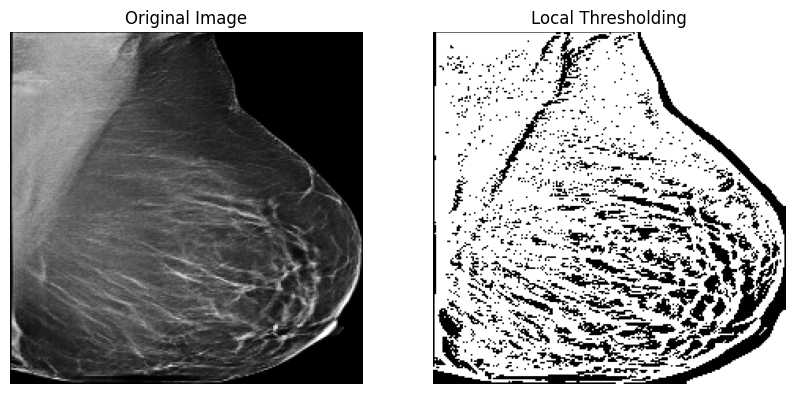

In [15]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# Use a block size of 35 instead of the default value
block_size = 35
local_thresh = threshold_local(img1, block_size, offset=10)
binary_local = img1 > local_thresh

# Create a new figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
ax[0].imshow(img1, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Display the thresholded image in the second subplot
ax[1].imshow(binary_local, cmap='gray')
ax[1].set_title('Local Thresholding')
ax[1].axis('off')

# Show the figure
plt.show()


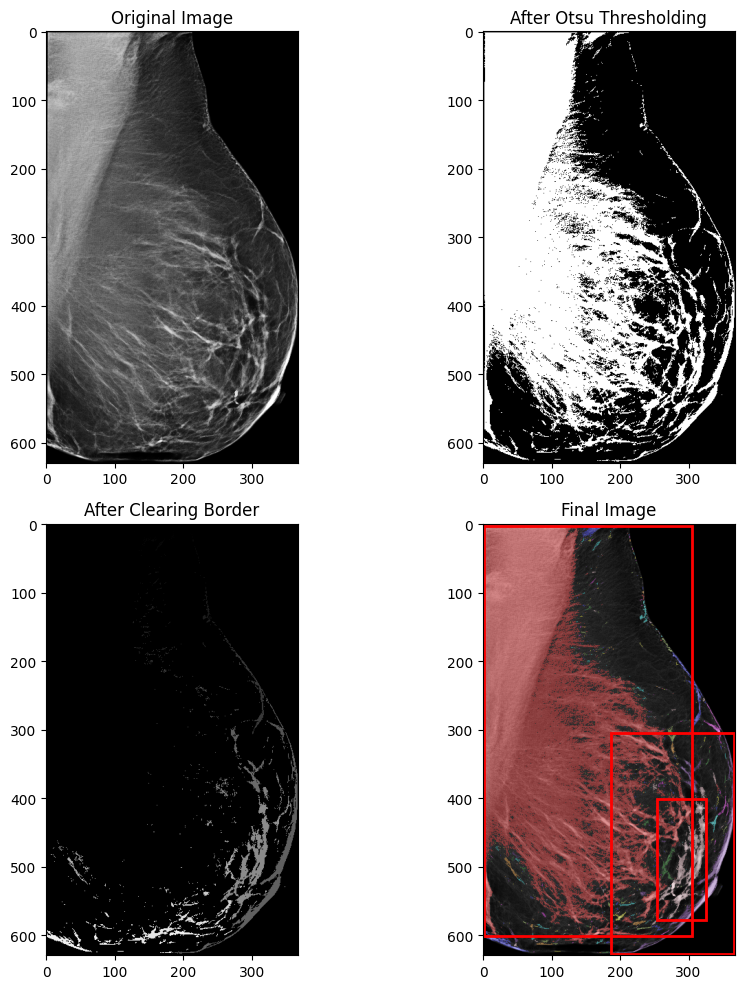

The number of large regions identified is: 3


In [22]:
import matplotlib.pyplot as plt
from skimage import io, filters, measure, color
from skimage.segmentation import clear_border
from scipy import ndimage as ndi

# Load the image
image_path = '/content/cropped_image.png'
image = io.imread(image_path)

# Apply Otsu's thresholding
thresh = filters.threshold_otsu(image)
binary = image > thresh

# Label the image
labels = measure.label(binary)

# Remove artifacts connected to image border
cleared = clear_border(labels)

# Label image regions
label_image = measure.label(cleared)
image_label_overlay = color.label2rgb(label_image, image=image)

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image
ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original Image')

# Display the image after applying Otsu's thresholding
ax[0, 1].imshow(binary, cmap=plt.cm.gray)
ax[0, 1].set_title('After Otsu Thresholding')

# Display the image after clearing the border
ax[1, 0].imshow(cleared, cmap=plt.cm.gray)
ax[1, 0].set_title('After Clearing Border')

# Display the final image with different colors for each box
ax[1, 1].imshow(image_label_overlay)

# Initialize a counter for the regions
region_count = 0

# Define a minimum area for the regions to keep
min_area = 500  # Change this value based on your needs-----------------------------------------------

for region in measure.regionprops(label_image):
    # Only add large regions to the image
    if region.area >= min_area:
        # Draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=2)
        ax[1, 1].add_patch(rect)
        region_count += 1

ax[1, 1].set_title('Final Image')

plt.tight_layout()
plt.show()

print(f'The number of large regions identified is: {region_count}')


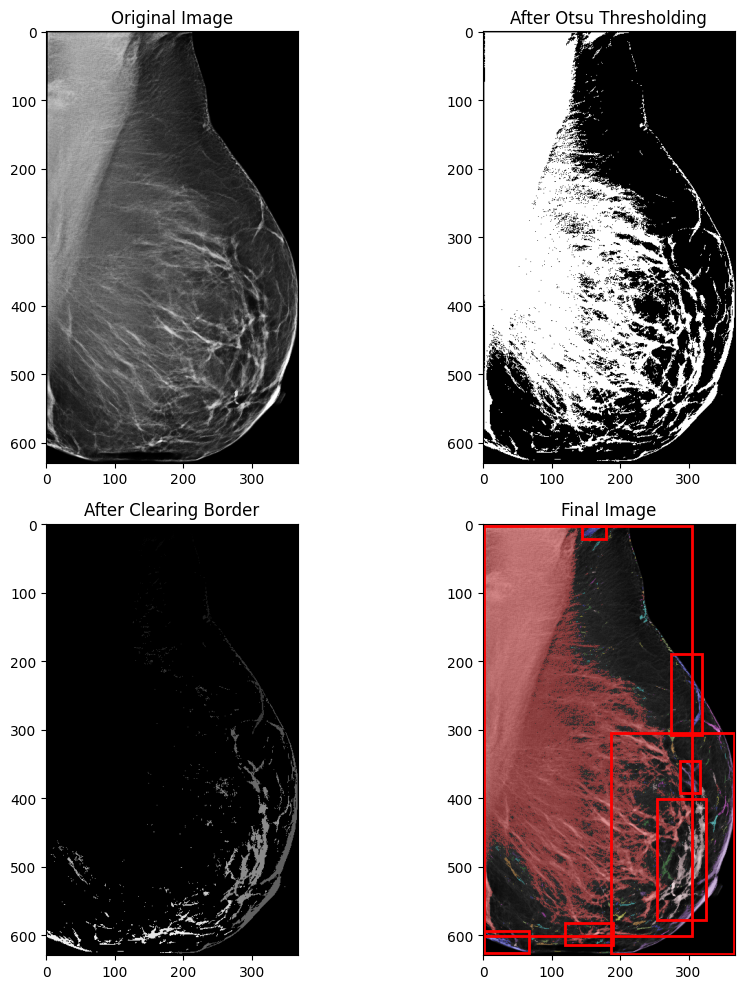

The number of large regions identified is: 8


In [23]:
import matplotlib.pyplot as plt
from skimage import io, filters, measure, color
from skimage.segmentation import clear_border
from scipy import ndimage as ndi

# Load the image
image_path = '/content/cropped_image.png'
image = io.imread(image_path)

# Apply Otsu's thresholding
thresh = filters.threshold_otsu(image)
binary = image > thresh

# Label the image
labels = measure.label(binary)

# Remove artifacts connected to image border
cleared = clear_border(labels)

# Label image regions
label_image = measure.label(cleared)
image_label_overlay = color.label2rgb(label_image, image=image)

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image
ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original Image')

# Display the image after applying Otsu's thresholding
ax[0, 1].imshow(binary, cmap=plt.cm.gray)
ax[0, 1].set_title('After Otsu Thresholding')

# Display the image after clearing the border
ax[1, 0].imshow(cleared, cmap=plt.cm.gray)
ax[1, 0].set_title('After Clearing Border')

# Display the final image with different colors for each box
ax[1, 1].imshow(image_label_overlay)

# Initialize a counter for the regions
region_count = 0

# Define a minimum area for the regions to keep
min_area = 250  # Change this value based on your needs

for region in measure.regionprops(label_image):
    # Only add large regions to the image
    if region.area >= min_area:
        # Draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=2)
        ax[1, 1].add_patch(rect)
        region_count += 1

ax[1, 1].set_title('Final Image')

plt.tight_layout()
plt.show()

print(f'The number of large regions identified is: {region_count}')

# The number of large regions identified is: 8

among them looking to find hight dense region

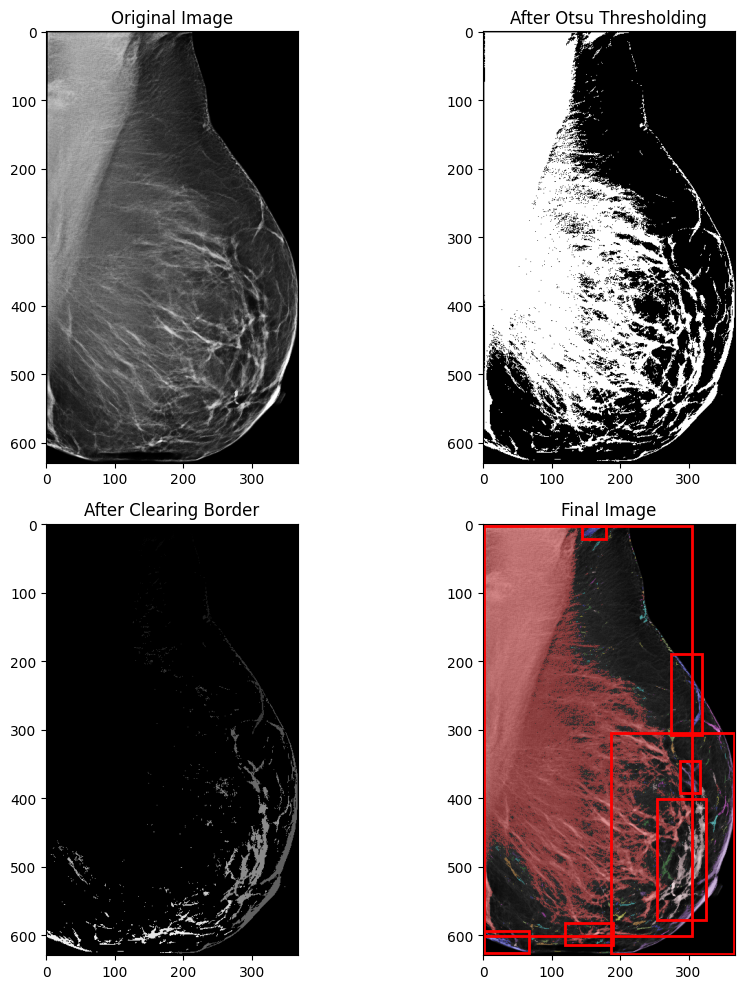

The number of large regions identified is: 8
The region with the highest mean intensity has an area of 2342 pixels and a mean intensity of 147.6404782237404.


In [24]:
import matplotlib.pyplot as plt
from skimage import io, filters, measure, color
from skimage.segmentation import clear_border
from scipy import ndimage as ndi

# Load the image
image_path = '/content/cropped_image.png'
image = io.imread(image_path)

# Apply Otsu's thresholding
thresh = filters.threshold_otsu(image)
binary = image > thresh

# Label the image
labels = measure.label(binary)

# Remove artifacts connected to image border
cleared = clear_border(labels)

# Label image regions
label_image = measure.label(cleared)
image_label_overlay = color.label2rgb(label_image, image=image)

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image
ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original Image')

# Display the image after applying Otsu's thresholding
ax[0, 1].imshow(binary, cmap=plt.cm.gray)
ax[0, 1].set_title('After Otsu Thresholding')

# Display the image after clearing the border
ax[1, 0].imshow(cleared, cmap=plt.cm.gray)
ax[1, 0].set_title('After Clearing Border')

# Display the final image with different colors for each box
ax[1, 1].imshow(image_label_overlay)

# Initialize a counter for the regions
region_count = 0

# Define a minimum area for the regions to keep
min_area = 250  # Change this value based on your needs

# Initialize max mean intensity to 0
max_mean_intensity = 0
max_region = None

for region in measure.regionprops(label_image, intensity_image=image):
    # Only add large regions to the image
    if region.area >= min_area:
        # Draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=2)
        ax[1, 1].add_patch(rect)
        region_count += 1

        # Update max mean intensity and max region
        if region.mean_intensity > max_mean_intensity:
            max_mean_intensity = region.mean_intensity
            max_region = region
            print(f'current region mean intensity is : {max_mean_intensity}')

ax[1, 1].set_title('Final Image')

plt.tight_layout()
plt.show()

print(f'The number of large regions identified is: {region_count}')
print(f'The region with the highest mean intensity has an area of {max_region.area} pixels and a mean intensity of {max_mean_intensity}.')


# step - 01
## Now Drawing binary Image based on the highest mean intensity


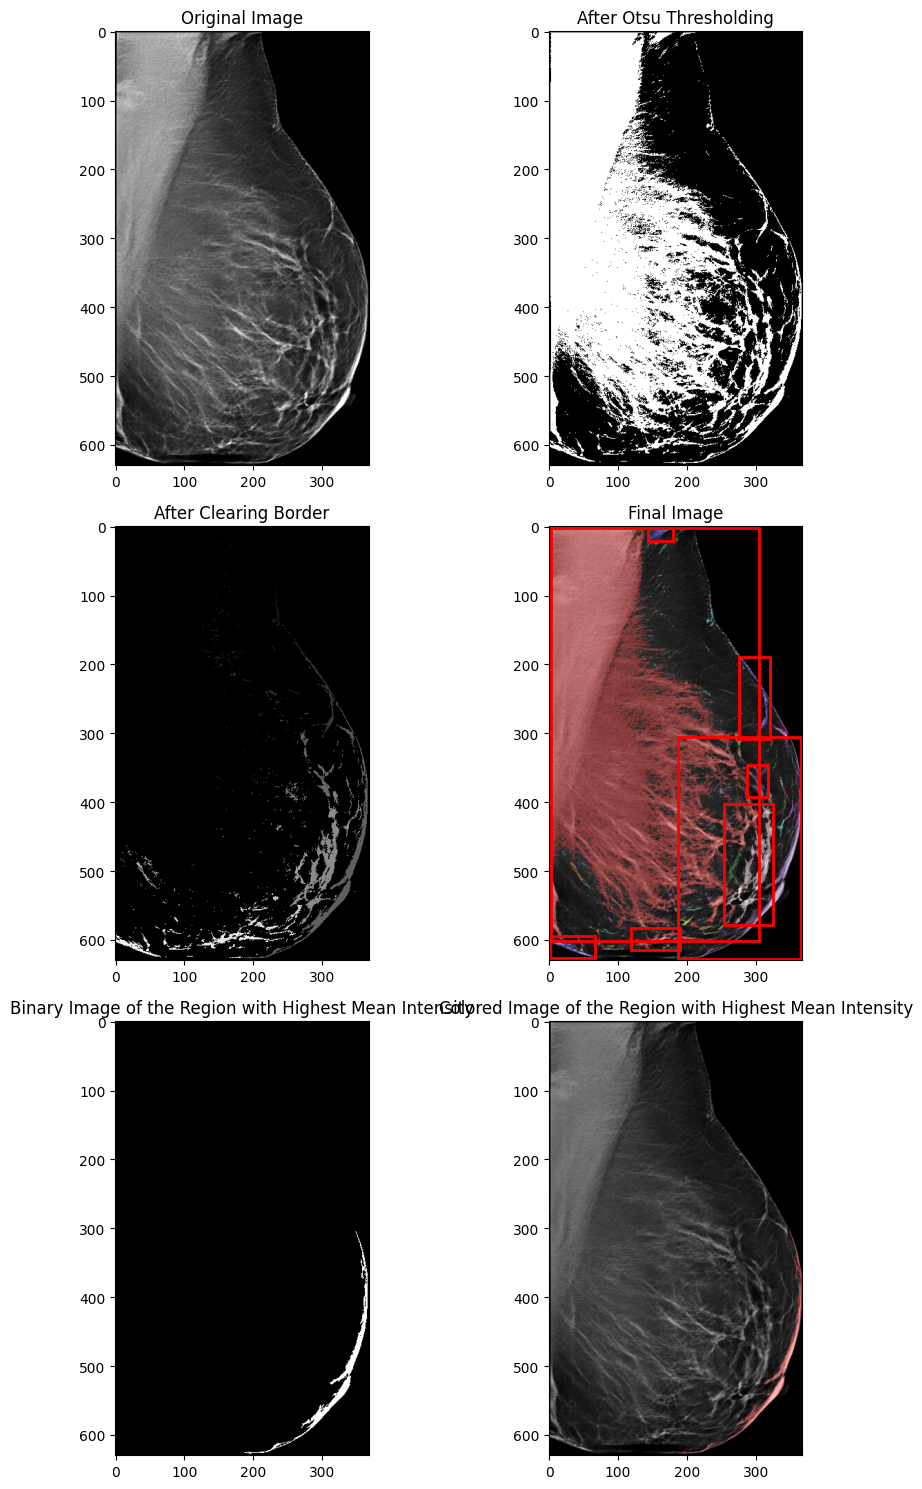

The number of large regions identified is: 8
The region with the highest mean intensity has an area of 2342 pixels and a mean intensity of 147.6404782237404.


In [25]:
import matplotlib.pyplot as plt
from skimage import io, filters, measure, color
from skimage.segmentation import clear_border
from scipy import ndimage as ndi
import numpy as np

# Load the image
image_path = '/content/cropped_image.png'
image = io.imread(image_path)

# Apply Otsu's thresholding
thresh = filters.threshold_otsu(image)
binary = image > thresh

# Label the image
labels = measure.label(binary)

# Remove artifacts connected to image border
cleared = clear_border(labels)

# Label image regions
label_image = measure.label(cleared)
image_label_overlay = color.label2rgb(label_image, image=image)

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

# Display the original image
ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original Image')

# Display the image after applying Otsu's thresholding
ax[0, 1].imshow(binary, cmap=plt.cm.gray)
ax[0, 1].set_title('After Otsu Thresholding')

# Display the image after clearing the border
ax[1, 0].imshow(cleared, cmap=plt.cm.gray)
ax[1, 0].set_title('After Clearing Border')

# Display the final image with different colors for each box
ax[1, 1].imshow(image_label_overlay)

# Initialize a counter for the regions
region_count = 0

# Define a minimum area for the regions to keep
min_area = 250  # Change this value based on your needs

# Initialize max mean intensity to 0
max_mean_intensity = 0
max_region = None

for region in measure.regionprops(label_image, intensity_image=image):
    # Only add large regions to the image
    if region.area >= min_area:
        # Draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=2)
        ax[1, 1].add_patch(rect)
        region_count += 1

        # Update max mean intensity and max region
        if region.mean_intensity > max_mean_intensity:
            max_mean_intensity = region.mean_intensity
            max_region = region

# Create a binary image based on the region with the highest mean intensity
binary_max_region = np.zeros_like(image, dtype=bool)
binary_max_region[max_region.coords[:, 0], max_region.coords[:, 1]] = 1

# Display the binary image of the region with the highest mean intensity
ax[2, 0].imshow(binary_max_region, cmap=plt.cm.gray)
ax[2, 0].set_title('Binary ROI High Mean Inte')

# Display the colored image of the region with the highest mean intensity
ax[2, 1].imshow(color.label2rgb(binary_max_region, image=image))
ax[2, 1].set_title('Colored ROI with Highest Mean Intensity')

ax[1, 1].set_title('Final Image')

plt.tight_layout()
plt.show()

print(f'The number of large regions identified is: {region_count}')
print(f'The region with the highest mean intensity has an area of {max_region.area} pixels and a mean intensity of {max_mean_intensity}.')


# **No  move , this is trap**

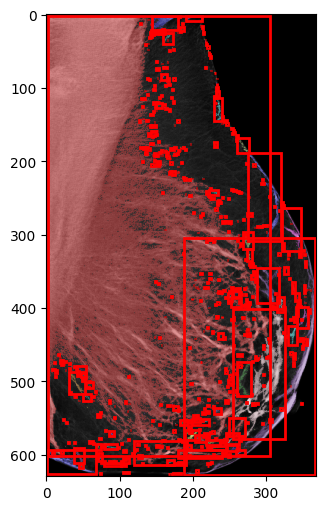

In [16]:
import matplotlib.pyplot as plt
from skimage import io, filters, measure, color
from skimage.segmentation import clear_border
from scipy import ndimage as ndi

# Load the image
image_path = '/content/cropped_image.png'
image = io.imread(image_path)

# Apply Otsu's thresholding
thresh = filters.threshold_otsu(image)
binary = image > thresh

# Label the image
labels = measure.label(binary)

# Remove artifacts connected to image border
cleared = clear_border(labels)

# Label image regions
label_image = measure.label(cleared)
image_label_overlay = color.label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in measure.regionprops(label_image):
    # Draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()


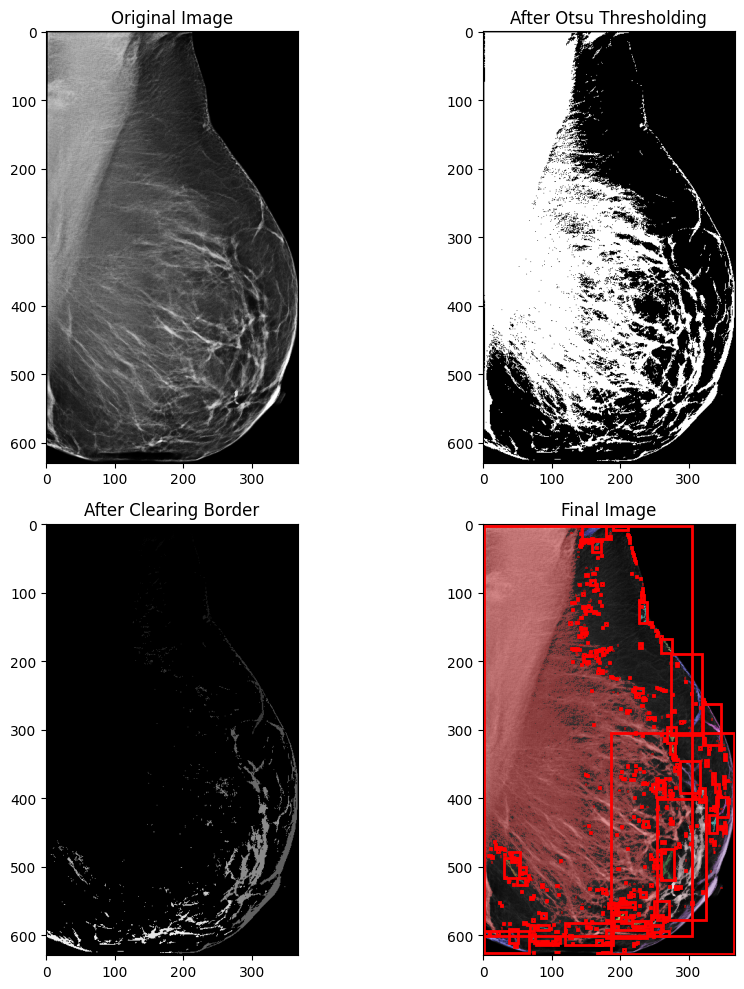

In [18]:
import matplotlib.pyplot as plt
from skimage import io, filters, measure, color
from skimage.segmentation import clear_border
from scipy import ndimage as ndi

# Load the image
image_path = '/content/cropped_image.png'
image = io.imread(image_path)

# Apply Otsu's thresholding
thresh = filters.threshold_otsu(image)
binary = image > thresh

# Label the image
labels = measure.label(binary)

# Remove artifacts connected to image border
cleared = clear_border(labels)

# Label image regions
label_image = measure.label(cleared)
image_label_overlay = color.label2rgb(label_image, image=image)

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image
ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original Image')

# Display the image after applying Otsu's thresholding
ax[0, 1].imshow(binary, cmap=plt.cm.gray)
ax[0, 1].set_title('After Otsu Thresholding')

# Display the image after clearing the border
ax[1, 0].imshow(cleared, cmap=plt.cm.gray)
ax[1, 0].set_title('After Clearing Border')

# Display the final image with different colors for each box
ax[1, 1].imshow(image_label_overlay)

for region in measure.regionprops(label_image):
    # Draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='red', linewidth=2)
    ax[1, 1].add_patch(rect)

ax[1, 1].set_title('Final Image')

plt.tight_layout()
plt.show()


In [20]:
region_count=0
for region in measure.regionprops(label_image):
    # Draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='red', linewidth=2)
    ax[1, 1].add_patch(rect)
    region_count += 1
print(f'The number of regions identified is: {region_count}')

<Figure size 640x480 with 0 Axes>

The number of regions identified is: 678
